In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from IPython.display import Image


In [3]:
# img = cv.imread('white_paper.jpg',0)
# ret,thresh = cv.threshold(img,127,255,0)
# contours,hierarchy = cv.findContours(thresh, 1, 2)
# cnt = contours[0]
# M = cv.moments(cnt)
# print(M)

In [120]:
epsilon = 1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)
# x, y, w, h = cv.boundingRect(approx)

# cv.drawContours(approx, (x, y), (x+w, y+h), (0, 255, 0), 1);

# cv.drawContours(img,[approx],0,(0,0,255),2)
# plt.imshow(approx,'gray')
# plt.title(titles[i])
# plt.xticks([]),plt.yticks([])

In [164]:
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

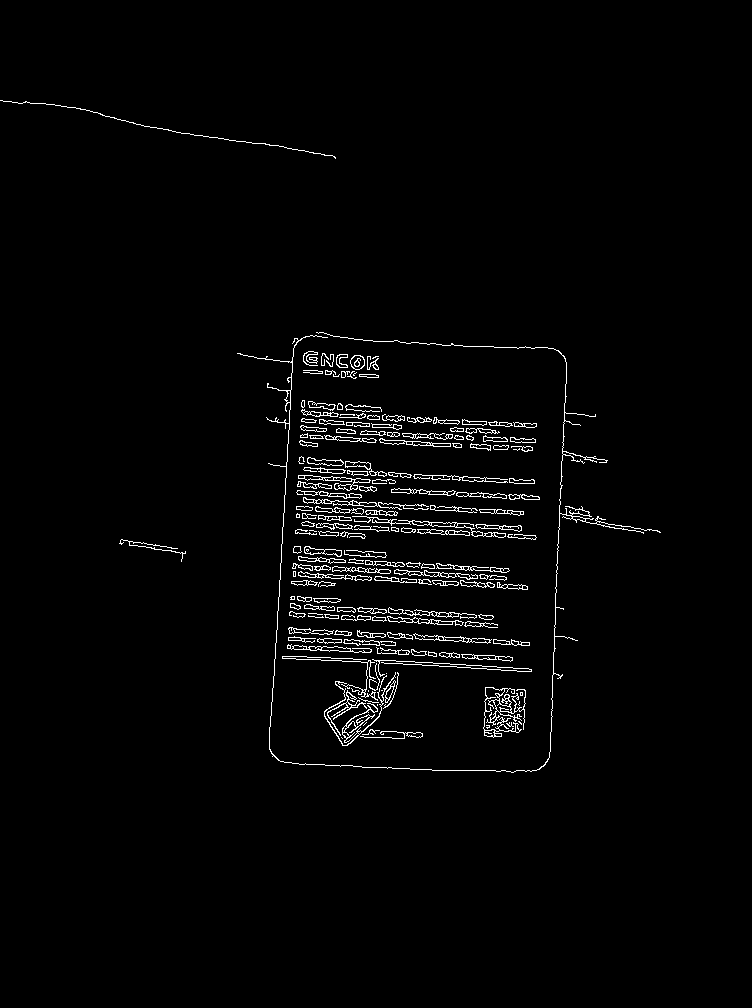

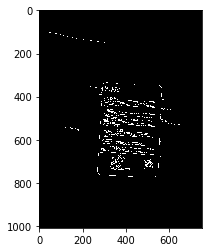

In [15]:
# im = cv.imread('doc.jpg')
# im = cv.imread('white_paper.jpg')
# im = cv.imread('square.jpg')
# im = cv.imread('coins.jpg')

im = cv.imread('real_small.jpg')
im = cv.imread('real_shadow.jpg')

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
preprocessed = cv.GaussianBlur(imgray, (5, 5), 0)



# _, coins_binary = cv.threshold(coins_preprocessed, 130, 255, cv.THRESH_BINARY)

# coins_binary = cv.bitwise_not(coins_binary)

# ret, thresh = cv.threshold(coins_binary, 2, 255, 0)



edges = cv.Canny(preprocessed, threshold1=30, threshold2=150)

plt.imshow(cv.cvtColor(edges, cv.COLOR_GRAY2RGB))

cv.imwrite("edges.png", edges)
Image(filename = "edges.png", width=500, height=500)
# inp = cv.dnn.blobFromImage(im, scalefactor=1.0, size=(args.width, args.height),
#                             mean=(104.00698793, 116.66876762, 122.67891434),
#                             swapRB=False, crop=False)

# inp = cv.dnn.blobFromImage(im, scalefactor=1.0, size=(500, 500),
#                             mean=(104.00698793, 116.66876762, 122.67891434),
#                             swapRB=False, crop=False)

# plt.imshow(cv.cvtColor(inp, cv.COLOR_GRAY2RGB))

1188


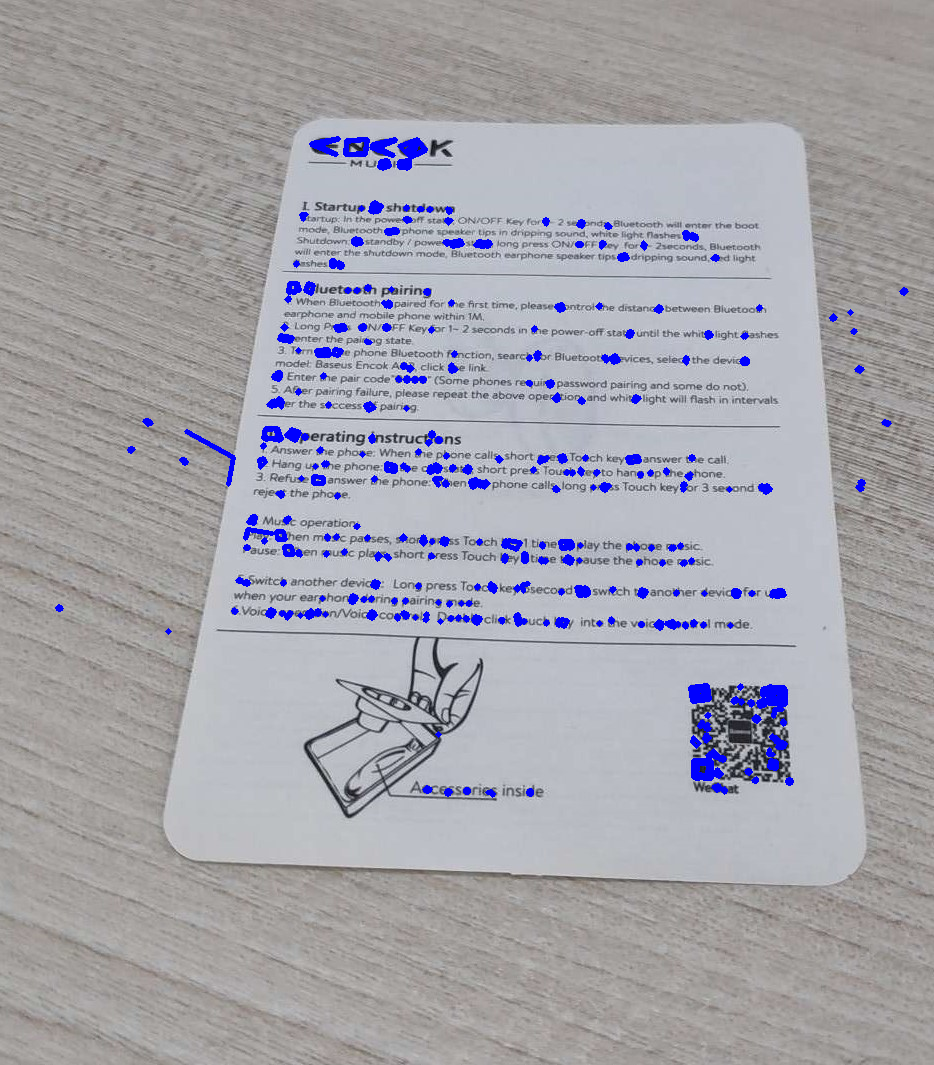

In [434]:

# im = cv.imread('doc.jpg',0)

contours, hierarchy = cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

approxes = []
j = 0

max = 0

for i in contours:
#     print (j)
    j = j + 1
    epsilon = 0.1*cv.arcLength(i,True)
    approx = cv.approxPolyDP(i,epsilon,True)
#     print (approx.shape)
#     print (approx)
    moment = cv.moments(approx)
    if len(approx) == 4:
#         cnt = i
#         if approx.size > max:
#             max = approx.size
#             print (max)
#         approxes.append(approx)
#         pass
#         print (approx)
        res = cv.drawContours(im, [approx], -1, (255,0,0), 3)

    
#     approxes.append(approx)
    

print (j)

# approxes = contours[4]


# res = cv.drawContours(im, [cnt], -1, (255,0,0), 3)
# res = cv.drawContours(im, approxes, -1, (0,255,0), 3)
# res = cv.drawContours(im, contours, -1, (0,255,0), 3)
# res = cv.drawContours(im, approxes, 3, (0,255,0), 3)
# cnt = contours[4]
# cv.drawContours(im, [cnt], 0, (0,255,0), 3)
cv.imwrite("contours.png", res)
# ![title]contours.png
Image(filename = "contours.png", width=500, height=500)

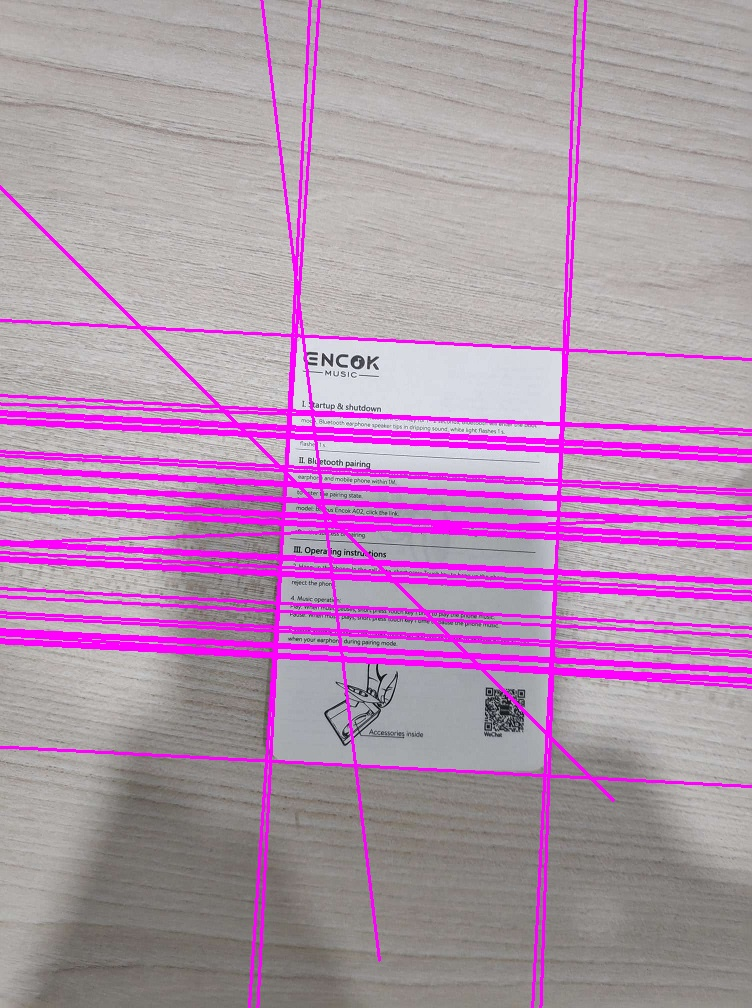

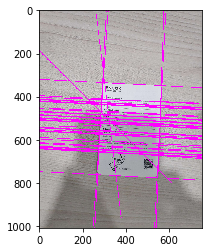

In [13]:
cups_lines = np.copy(im)
num_pix_threshold = 110
lines = cv.HoughLines(edges, 1, np.pi/180, num_pix_threshold)

for line in lines: 
    for rho, theta in line:
        # convert line equation into start and end points of line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho 
        y0 = b * rho 

        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))

        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(cups_lines, (x1,y1), (x2,y2), (255,0,255), 2)
        
plt.imshow(cv.cvtColor(cups_lines, cv.COLOR_BGR2RGB))
cv.imwrite('cups-lines.jpg', cups_lines)
Image(filename = "cups-lines.jpg", width=500, height=500)

In [141]:
import numpy as np
import itertools
import math
import itertools
def lines_are_same(line1, line2):
    return line1 == line2


def lines_angle(line1, line2):
    return np.abs(line1[1] - line2[1]) * 180 / np.pi

def find_intersections(lines, im, angle_thr=45):
    height, width = im.shape[:2]
    intersections = []
    vertex_id = 0
    for line1, line2 in itertools.permutations(lines, 2):
        if _angles_are_similar(line1, line2, angle_thr):
            continue
        coords = _find_intersection_coords(line1, line2)
        if _coords_are_valid(coords, width, height) and not _already_present(coords, intersections):
            intersections.append({"id": vertex_id,
                                  "lines": (line1, line2),
                                  "coords": coords})
            vertex_id += 1
    return intersections


def _find_intersection_coords(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    a = [[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]]
    b = [[rho1], [rho2]]
    try:
        # aX = b, solve for x
        x, y = np.round(np.linalg.solve(a, b))
        return int(x), int(y)
    except np.linalg.linalg.LinAlgError:
        # singular matrix
        return -1, -1


def _already_present(coords, intersections):
    return (
        True
        if any(intersection["coords"] == coords for intersection in intersections)
        else False
    )


def _angles_are_similar(line1, line2, angle_thr):
    return lines_angle(line1, line2) < angle_thr


def _coords_are_valid(coords, width, height):
    return 0 < coords[0] < width and 0 < coords[1] < height

def _group_similar(lines, thr):
    lines = sorted(lines, key=lambda line: line[0])
    lines_unique = []
    for to_add in lines:
        if not _is_duplicated(to_add, lines_unique, thr):
            lines_unique.append(to_add)
    return lines_unique

def _is_duplicated(line, lines, thr):
    return any(abs(math.fabs(line[0]) - math.fabs(_line[0])) < thr for _line in lines)


def _cvhoughlines2list(lines):
    # line[0][0] = rho
    # line[0][1] = theta
    return [(line[0][0], line[0][1]) for line in lines]




def find_quadrilaterals(intersections):
    graph = _build_graph(intersections)
    loops = []
    [_bounded_dfs(graph, node, loops) for node in graph]
    return _cycles2coords(loops, intersections)


def _cycles2coords(cycles, intersections):
    return [[_node2coords(node, intersections)for node in quadrilateral]
            for quadrilateral in cycles]


def _node2coords(node, intersections):
    return next(corner["coords"] for corner in intersections if corner["id"] == node)


def _build_graph(intersections):
    graph = {k["id"]: [] for k in intersections}
    for i1, i2 in itertools.permutations(intersections, 2):
        if _common_line_exists(i1["lines"], i2["lines"]):
            graph[i1["id"]].append(i2["id"])
    return graph


def _common_line_exists(l1, l2):
    common_line = set(list(l1)) & set(list(l2))
    return True if common_line else False


def _bounded_dfs(neighbours, current, loops, seen=[]):
    if current in seen:
        return
    seen.append(current)
    if len(seen) == 4:
        _add_if_loop(current, neighbours, seen, loops)
    else:
        [_bounded_dfs(neighbours, neighbour, loops, seen=seen)
         for neighbour in neighbours[current]]
    del seen[-1]


def _add_if_loop(current, neighbours, seen, cycles):
    if seen[0] in neighbours[current]:
        cycles.append(tuple(seen))

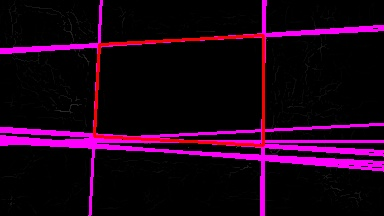

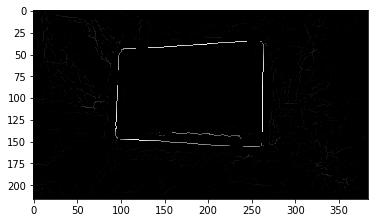

In [189]:
processed = cv.imread('processed2.png')
# processed = cv.imread('edges.png')

cups_lines = np.copy(processed)
num_pix_threshold = 80
# kernel = np.ones((5,5), cv.MORPH_RECT) 
# Imgproc.getStructuringElement(Imgproc.MORPH_RECT, new Size(9.0, 9.0));
kernel = cv.getStructuringElement(cv.MORPH_RECT, (9, 9))
imgray = cv.cvtColor(processed, cv.COLOR_BGR2GRAY)


# preprocessed = cv.GaussianBlur(imgray, (5, 5), 0)
# imgray = cv.dilate(imgray, kernel) 

plt.imshow(cv.cvtColor(imgray, cv.COLOR_BGR2RGB))
lines = cv.HoughLines(imgray, 1, np.pi/180, num_pix_threshold, 65, 20, 20)
# lines = cv.HoughLinesP(imgray, 1, np.pi/180, num_pix_threshold, 45, 10, 20)

# for line in lines:
#     for x1,y1,x2,y2 in line:
#         #how to convert 2-points -> . a line.. 
#         cv.line(cups_lines, (x1,y1), (x2,y2), (255,0,255), 2)
        
# color_edges = np.dstack((processed, processed, processed))
# combo = cv.addWeighted(color_edges, 0.8, cups_lines, 1, 0)
for line in lines: 
    for rho, theta in line:
        # convert line equation into start and end points of line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho 
        y0 = b * rho 

        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))

        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(cups_lines, (x1,y1), (x2,y2), (255,0,255), 2)
        
# plt.imshow(cv.cvtColor(cups_lines, cv.COLOR_BGR2RGB))
group_similar_thr=30
lines = _cvhoughlines2list(lines)
if group_similar_thr != 0:
    lines = _group_similar(lines, group_similar_thr)
lines2 = find_intersections(lines, cups_lines)

quad = find_quadrilaterals(lines2)
# print (quad)

for line in quad:
#     print (line['lines'])
    cv.line(cups_lines, line[0], line[1], (0,0,255), 2)
cv.imwrite('processed_lines.jpg', cups_lines)
Image(filename = "processed_lines.jpg", width=500, height=500)
# Image(filename = "processed.png", width=500, height=500)